<div style="text-align: center; color: Red; font-family: Arial;">
    <h1> Multi-Class Prediction of Obesity Risk </h1>
</div>

## `01` Business Problem Understanding :
- The aim is to estimate the risk of obesity, which is associated with cardiovascular disease in individuals.

## `02` Data Understanding¶
- id: Personal ID
- Gender: Gender of the person concerned
- Age: Age of the person concerned
- Height: Height of the person concerned
- Weight: Weight of the person concerned
- family_history_with_overweight: Information on whether there are overweight people in the family
- FAVC: Frequent Consumption of High Caloric Food
- FCVC: Frequency of Consumption of Vegetables
- NCP: Number of Main Meals per Day
- CAEC: Consumption of Food Between Meals
- SMOKE: Information on whether the person concerned is a smoker
- CH2O: Daily Water Consumption
- SCC: Monitoring Caloric Intake
- FAF: Physical Activity Frequency
- TUE: Time Using Technology Devices
- CALC: Consumption of Alcohol
- MTRANS: Vehicle information used by the person concerned for transportation
- NObeyesdad: Type of obesity

## `03` Project Objective:-

- The goal of this project is to develop a machine learning model capable of accurately predicting obesity risk across multiple classes. classifying individuals based on their obesity risk and interpreting model predictions, we aim to empower individuals with a deeper understanding of their health status. Additionally, this model can serve as a valuable tool for healthcare professionals, enabling early intervention and personalized recommendations to mitigate obesity-related health risks.

## `04` Code :

## `04.1` import libraries

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf

%matplotlib inline

2025-04-04 20:24:09.096706: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-04-04 20:24:09.106561: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1743791049.117615   69693 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1743791049.120929   69693 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1743791049.129632   69693 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking 

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
from utils import *

## `04.2` Read Data

In [4]:
# train = pd.read_csv("/kaggle/input/playground-series-s4e2/train.csv")
# test = pd.read_csv("/kaggle/input/playground-series-s4e2/test.csv")
# submission = pd.read_csv("/kaggle/input/playground-series-s4e2/sample_submission.csv")

In [5]:
train = pd.read_csv("Data/train.csv")
test = pd.read_csv("Data/test.csv")

## `04.3` EDA

In [6]:
train.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II


In [7]:
train.shape

(20758, 18)

In [8]:
train.rename(columns={"family_history_with_overweight": "family_history"}, inplace=True)

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              20758 non-null  int64  
 1   Gender          20758 non-null  object 
 2   Age             20758 non-null  float64
 3   Height          20758 non-null  float64
 4   Weight          20758 non-null  float64
 5   family_history  20758 non-null  object 
 6   FAVC            20758 non-null  object 
 7   FCVC            20758 non-null  float64
 8   NCP             20758 non-null  float64
 9   CAEC            20758 non-null  object 
 10  SMOKE           20758 non-null  object 
 11  CH2O            20758 non-null  float64
 12  SCC             20758 non-null  object 
 13  FAF             20758 non-null  float64
 14  TUE             20758 non-null  float64
 15  CALC            20758 non-null  object 
 16  MTRANS          20758 non-null  object 
 17  NObeyesdad      20758 non-null 

In [10]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
id,20758.0,10378.500000,5992.462780,0.00,5189.250000,10378.500000,15567.750000,20757.000000
Age,20758.0,23.841804,5.688072,14.00,20.000000,22.815416,26.000000,61.000000
Height,20758.0,1.700245,0.087312,1.45,1.631856,1.700000,1.762887,1.975663
Weight,20758.0,87.887768,26.379443,39.00,66.000000,84.064875,111.600553,165.057269
FCVC,20758.0,2.445908,0.533218,1.00,2.000000,2.393837,3.000000,3.000000
NCP,20758.0,2.761332,0.705375,1.00,3.000000,3.000000,3.000000,4.000000
CH2O,20758.0,2.029418,0.608467,1.00,1.792022,2.000000,2.549617,3.000000
FAF,20758.0,0.981747,0.838302,0.00,0.008013,1.000000,1.587406,3.000000
TUE,20758.0,0.616756,0.602113,0.00,0.000000,0.573887,1.000000,2.000000


In [11]:
train.isnull().sum()/train.shape[0] # percentage of the null values

id                0.0
Gender            0.0
Age               0.0
Height            0.0
Weight            0.0
family_history    0.0
FAVC              0.0
FCVC              0.0
NCP               0.0
CAEC              0.0
SMOKE             0.0
CH2O              0.0
SCC               0.0
FAF               0.0
TUE               0.0
CALC              0.0
MTRANS            0.0
NObeyesdad        0.0
dtype: float64

In [12]:
train.duplicated().sum()

np.int64(0)

In [13]:
numerical = train.select_dtypes(include=["number"])
numerical.columns

Index(['id', 'Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE'], dtype='object')

In [14]:
categorical = train.select_dtypes(include=["object"])
categorical.columns

Index(['Gender', 'family_history', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC',
       'MTRANS', 'NObeyesdad'],
      dtype='object')

In [15]:
numerical_stats = numerical[1:].agg([min, max, 'mean',"median"]).T.style.background_gradient(cmap="Greens")  
numerical_stats

/tmp/ipykernel_69693/145335564.py:1: FutureWarning: The provided callable <built-in function min> is currently using Series.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  numerical_stats = numerical[1:].agg([min, max, 'mean',"median"]).T.style.background_gradient(cmap="Greens")
/tmp/ipykernel_69693/145335564.py:1: FutureWarning: The provided callable <built-in function max> is currently using Series.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  numerical_stats = numerical[1:].agg([min, max, 'mean',"median"]).T.style.background_gradient(cmap="Greens")
/tmp/ipykernel_69693/145335564.py:1: FutureWarning: The provided callable <built-in function min> is currently using Series.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instea

,min,max,mean,median
id,1.000000,20757.000000,10379.000000,10379.000000
Age,14.000000,61.000000,23.841775,22.815416
Height,1.450000,1.975663,1.700245,1.700000
Weight,39.000000,165.057269,87.888068,84.064875
FCVC,1.000000,3.000000,2.445930,2.393837
NCP,1.000000,4.000000,2.761322,3.000000
CH2O,1.000000,3.000000,2.029383,2.000000
FAF,0.000000,3.000000,0.981794,1.000000
TUE,0.000000,2.000000,0.616739,0.573887


In [16]:
for col in list(train.describe(include="object")):
    print(f"Column: {col}'s count values:\n")

    # Create a dictionary to store value counts
    value_count_dict = {
        'Value': train[col].value_counts().index.tolist(),
        'Count': train[col].value_counts().values.tolist()
    }

    # Convert dictionary to DataFrame
    value_count_df = pd.DataFrame(value_count_dict)
    display(value_count_df)
    
    print("\n" + "-"*40 + "\n")

Column: Gender's count values:



,Value,Count
0,Female,10422
1,Male,10336



----------------------------------------

Column: family_history's count values:



,Value,Count
0,yes,17014
1,no,3744



----------------------------------------

Column: FAVC's count values:



,Value,Count
0,yes,18982
1,no,1776



----------------------------------------

Column: CAEC's count values:



,Value,Count
0,Sometimes,17529
1,Frequently,2472
2,Always,478
3,no,279



----------------------------------------

Column: SMOKE's count values:



,Value,Count
0,no,20513
1,yes,245



----------------------------------------

Column: SCC's count values:



,Value,Count
0,no,20071
1,yes,687



----------------------------------------

Column: CALC's count values:



,Value,Count
0,Sometimes,15066
1,no,5163
2,Frequently,529



----------------------------------------

Column: MTRANS's count values:



,Value,Count
0,Public_Transportation,16687
1,Automobile,3534
2,Walking,467
3,Motorbike,38
4,Bike,32



----------------------------------------

Column: NObeyesdad's count values:



,Value,Count
0,Obesity_Type_III,4046
1,Obesity_Type_II,3248
2,Normal_Weight,3082
3,Obesity_Type_I,2910
4,Insufficient_Weight,2523
5,Overweight_Level_II,2522
6,Overweight_Level_I,2427



----------------------------------------



In [17]:
for col in list(train.describe(include="object")):
    print(f"Column: {col}'s count values:\n")

    # Create a dictionary to store value counts
    value_count_dict = {
        'Value': train[col].value_counts().index.tolist(),
        'Count': train[col].value_counts().values.tolist()
    }

    # Convert dictionary to DataFrame
    value_count_df = pd.DataFrame(value_count_dict)
    display(value_count_df)
    
    print("\n" + "-"*40 + "\n")

Column: Gender's count values:



,Value,Count
0,Female,10422
1,Male,10336



----------------------------------------

Column: family_history's count values:



,Value,Count
0,yes,17014
1,no,3744



----------------------------------------

Column: FAVC's count values:



,Value,Count
0,yes,18982
1,no,1776



----------------------------------------

Column: CAEC's count values:



,Value,Count
0,Sometimes,17529
1,Frequently,2472
2,Always,478
3,no,279



----------------------------------------

Column: SMOKE's count values:



,Value,Count
0,no,20513
1,yes,245



----------------------------------------

Column: SCC's count values:



,Value,Count
0,no,20071
1,yes,687



----------------------------------------

Column: CALC's count values:



,Value,Count
0,Sometimes,15066
1,no,5163
2,Frequently,529



----------------------------------------

Column: MTRANS's count values:



,Value,Count
0,Public_Transportation,16687
1,Automobile,3534
2,Walking,467
3,Motorbike,38
4,Bike,32



----------------------------------------

Column: NObeyesdad's count values:



,Value,Count
0,Obesity_Type_III,4046
1,Obesity_Type_II,3248
2,Normal_Weight,3082
3,Obesity_Type_I,2910
4,Insufficient_Weight,2523
5,Overweight_Level_II,2522
6,Overweight_Level_I,2427



----------------------------------------



In [18]:
# Loop over numerical columns
for col in list(train.select_dtypes(include='number')):
    print(f"Column: {col} - Value Counts:\n")
    
    # Create a dictionary to store value counts
    value_count_dict = {
        'Value': train[col].value_counts().index.tolist(),
        'Count': train[col].value_counts().values.tolist()
    }

    # Convert to DataFrame
    value_count_df = pd.DataFrame(value_count_dict)
    display(value_count_df)

    print("\n" + "-"*40 + "\n")


Column: id - Value Counts:



,Value,Count
0,20757,1
1,0,1
2,1,1
3,2,1
4,3,1
...,...,...
20753,10,1
20754,9,1
20755,8,1
20756,7,1



----------------------------------------

Column: Age - Value Counts:



,Value,Count
0,18.000000,1916
1,26.000000,1806
2,21.000000,1643
3,23.000000,1202
4,19.000000,886
...,...,...
1698,17.504873,1
1699,21.580858,1
1700,39.128946,1
1701,25.746113,1



----------------------------------------

Column: Height - Value Counts:



,Value,Count
0,1.700000,1334
1,1.650000,782
2,1.600000,672
3,1.750000,659
4,1.800000,517
...,...,...
1828,1.815347,1
1829,1.718180,1
1830,1.702958,1
1831,1.716590,1



----------------------------------------

Column: Weight - Value Counts:



,Value,Count
0,80.000000,866
1,75.000000,630
2,50.000000,618
3,60.000000,506
4,70.000000,486
...,...,...
1974,110.622764,1
1975,104.554925,1
1976,108.790549,1
1977,44.096062,1



----------------------------------------

Column: FCVC - Value Counts:



,Value,Count
0,3.000000,7658
1,2.000000,7653
2,1.000000,275
3,2.967300,121
4,2.766612,54
...,...,...
929,2.973499,1
930,2.417635,1
931,2.690754,1
932,2.099687,1



----------------------------------------

Column: NCP - Value Counts:



,Value,Count
0,3.000000,14706
1,1.000000,1976
2,4.000000,715
3,2.993623,39
4,2.695396,25
...,...,...
684,2.818026,1
685,1.164839,1
686,2.152733,1
687,2.814518,1



----------------------------------------

Column: CH2O - Value Counts:



,Value,Count
0,2.000000,6616
1,1.000000,2799
2,3.000000,1571
3,2.825629,77
4,2.868167,60
...,...,...
1501,2.200588,1
1502,2.938687,1
1503,1.728332,1
1504,2.983889,1



----------------------------------------

Column: FAF - Value Counts:



,Value,Count
0,0.000000,5044
1,1.000000,4097
2,2.000000,2391
3,3.000000,800
4,1.097905,56
...,...,...
1355,2.523793,1
1356,0.988668,1
1357,0.271174,1
1358,0.540397,1



----------------------------------------

Column: TUE - Value Counts:



,Value,Count
0,0.000000,6566
1,1.000000,4326
2,2.000000,1133
3,0.002600,78
4,0.723154,65
...,...,...
1292,0.290979,1
1293,0.733085,1
1294,0.768071,1
1295,1.967919,1



----------------------------------------



In [19]:
# Initialize lists to store results
number_of_outliers = [None] * len(train.select_dtypes(include=["number"]).columns)
q99 = [None] * len(train.select_dtypes(include=["number"]).columns)
q1 = [None] * len(train.select_dtypes(include=["number"]).columns)
outlier_percentage = [None] * len(train.select_dtypes(include=["number"]).columns)
total_rows = len(train)

# Loop over numerical columns
for i, p in enumerate(train.select_dtypes(include=["number"]).columns):
    q99[i], q1[i] = np.percentile(train[p], [99, 1])
    
    # Identify outliers (values beyond 99th and 1st percentiles)
    outliers = (train[p] > q99[i]) | (train[p] < q1[i])
    number_of_outliers[i] = outliers.sum()
    
    # Calculate percentage of outliers
    outlier_percentage[i] = (number_of_outliers[i] / total_rows) * 100
    
    # Print the results
    print(f'Outliers in {p}: {number_of_outliers[i]} ({outlier_percentage[i]:.2f}% of total rows)')
    print("*" * 40)

Outliers in id: 416 (2.00% of total rows)
****************************************
Outliers in Age: 406 (1.96% of total rows)
****************************************
Outliers in Height: 411 (1.98% of total rows)
****************************************
Outliers in Weight: 334 (1.61% of total rows)
****************************************
Outliers in FCVC: 0 (0.00% of total rows)
****************************************
Outliers in NCP: 0 (0.00% of total rows)
****************************************
Outliers in CH2O: 0 (0.00% of total rows)
****************************************
Outliers in FAF: 0 (0.00% of total rows)
****************************************
Outliers in TUE: 0 (0.00% of total rows)
****************************************


In [20]:
# Convert results into a DataFrame for better readability
outlier_summary = pd.DataFrame({
    'Column': train.select_dtypes(include=["number"]).columns,
    'Number of Outliers': number_of_outliers,
    'Outlier Percentage': outlier_percentage,
    '1st Percentile (q1)': q1,
    '99th Percentile (q99)': q99
})

# Display the outlier summary
display(outlier_summary)

,Column,Number of Outliers,Outlier Percentage,1st Percentile (q1),99th Percentile (q99)
0,id,416,2.004047,207.570000,20549.430000
1,Age,406,1.955872,16.913841,41.000000
2,Height,411,1.979960,1.507106,1.889104
3,Weight,334,1.609018,42.000000,137.855041
4,FCVC,0,0.000000,1.000000,3.000000
5,NCP,0,0.000000,1.000000,4.000000
6,CH2O,0,0.000000,1.000000,3.000000
7,FAF,0,0.000000,0.000000,3.000000
8,TUE,0,0.000000,0.000000,2.000000


## `04.4` Visualization

array([[<Axes: title={'center': 'id'}>, <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Height'}>],
       [<Axes: title={'center': 'Weight'}>,
        <Axes: title={'center': 'FCVC'}>,
        <Axes: title={'center': 'NCP'}>],
       [<Axes: title={'center': 'CH2O'}>,
        <Axes: title={'center': 'FAF'}>, <Axes: title={'center': 'TUE'}>]],
      dtype=object)

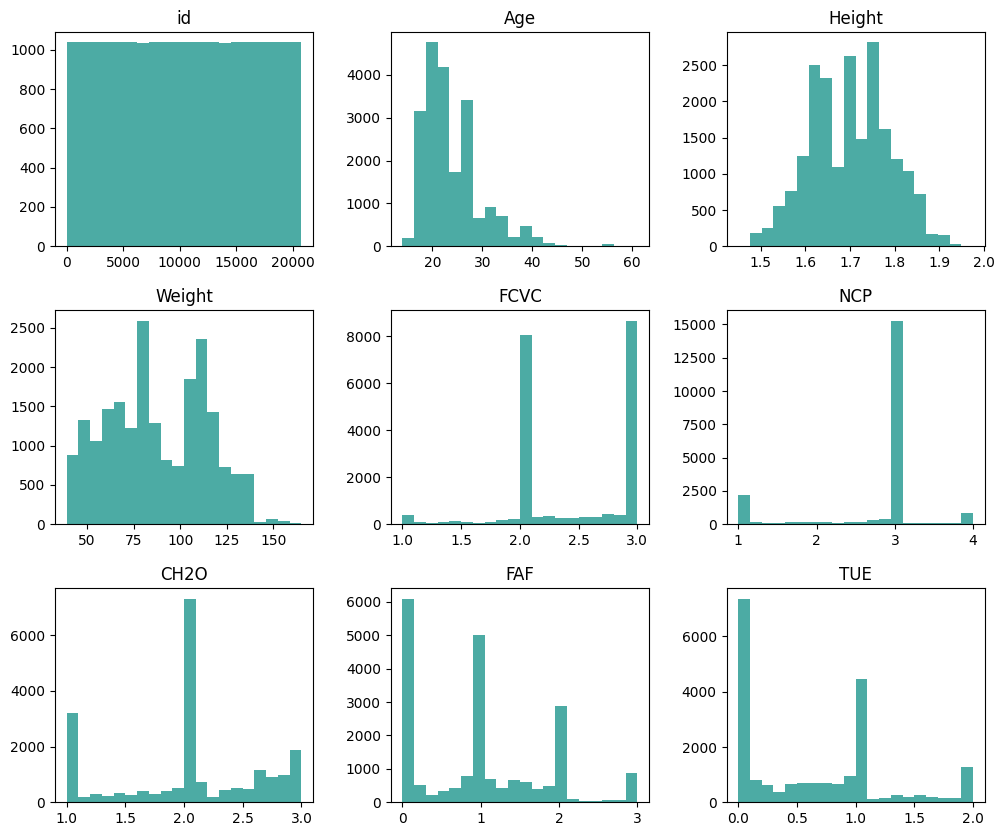

In [21]:
numerical.hist(figsize=(12, 10), bins=20, color='#4caba4', grid=False)

Plotting: Gender


/home/israa/Desktop/ML_proj/utils.py:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=categorical, y=col, ax=ax[1], order=labels, palette=colors)


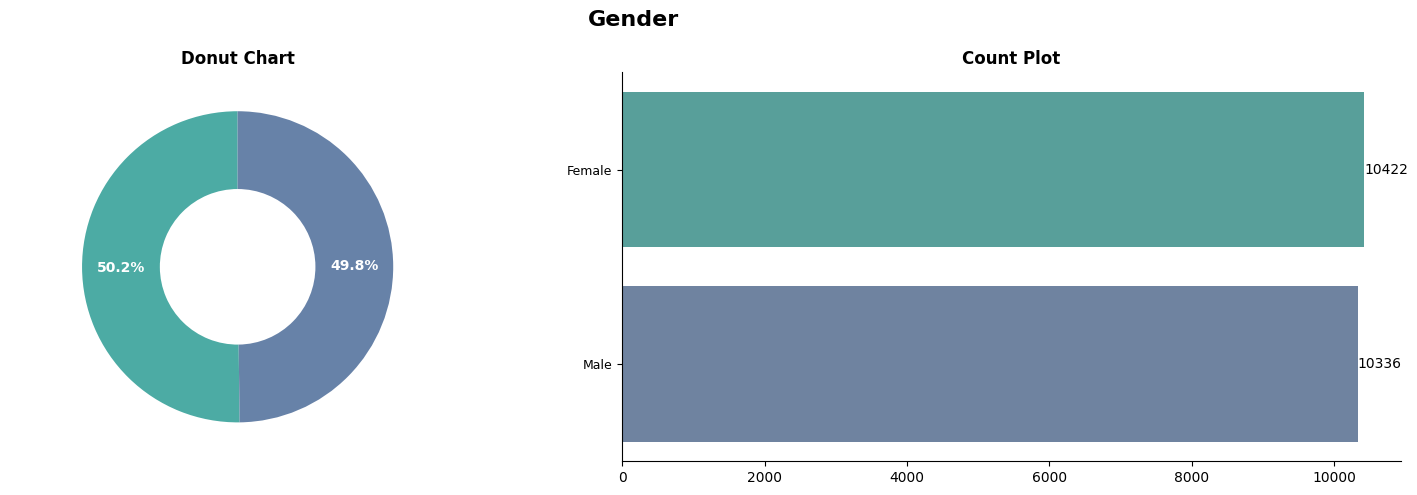

Plotting: family_history


/home/israa/Desktop/ML_proj/utils.py:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=categorical, y=col, ax=ax[1], order=labels, palette=colors)


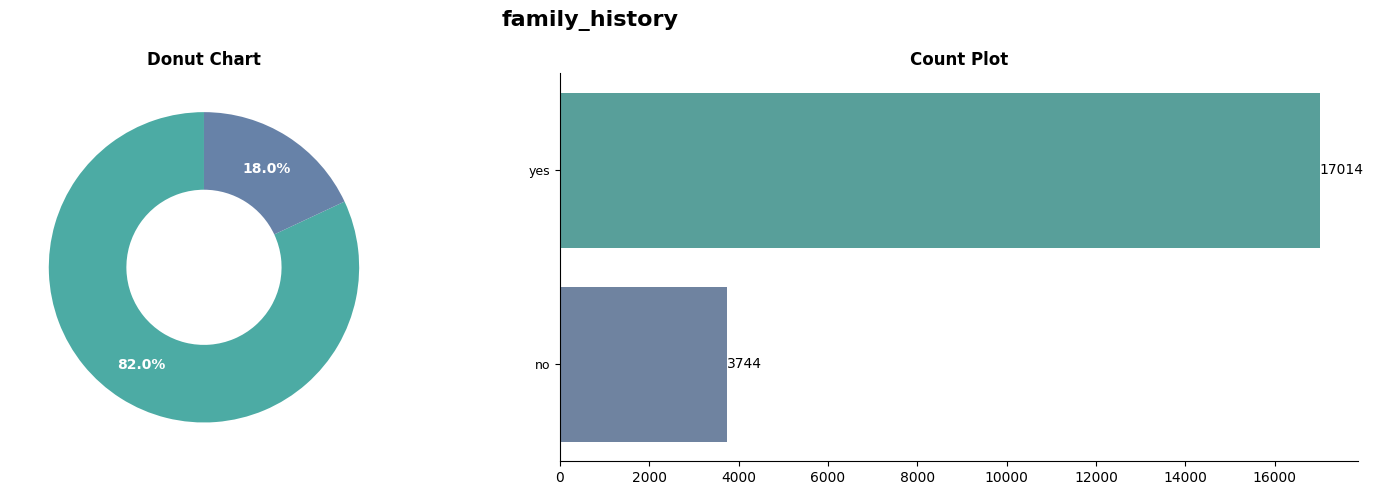

Plotting: FAVC


/home/israa/Desktop/ML_proj/utils.py:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=categorical, y=col, ax=ax[1], order=labels, palette=colors)


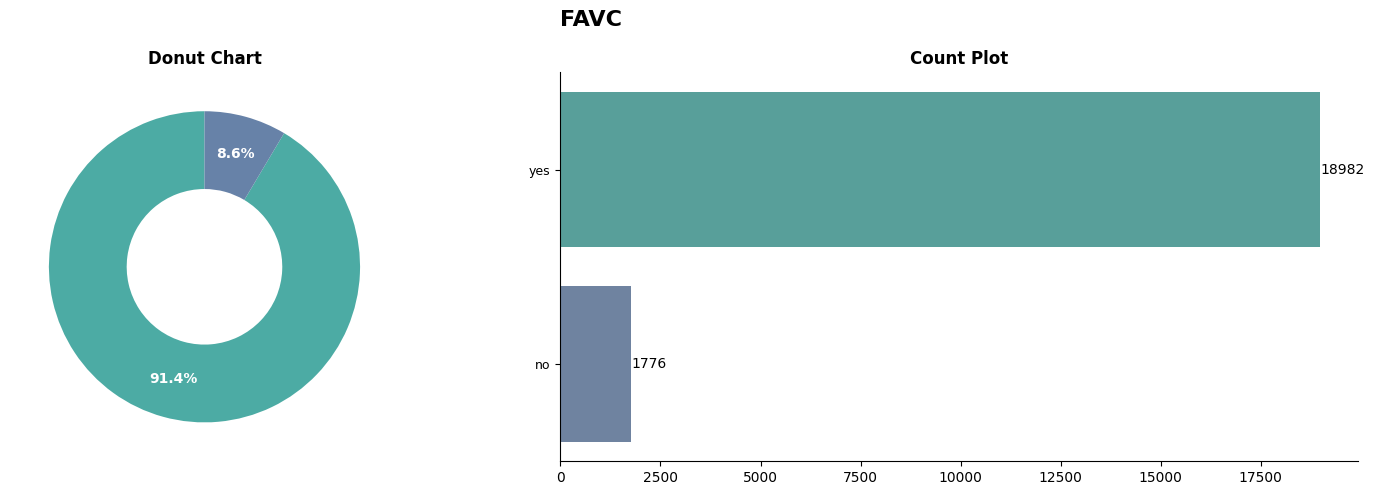

Plotting: CAEC


/home/israa/Desktop/ML_proj/utils.py:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=categorical, y=col, ax=ax[1], order=labels, palette=colors)


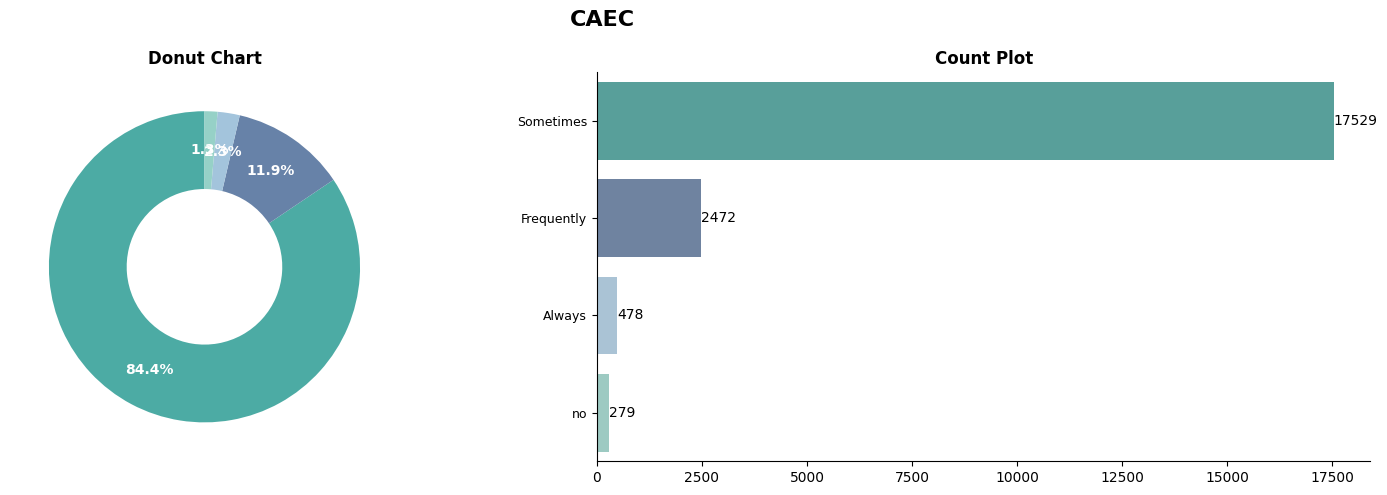

Plotting: SMOKE


/home/israa/Desktop/ML_proj/utils.py:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=categorical, y=col, ax=ax[1], order=labels, palette=colors)


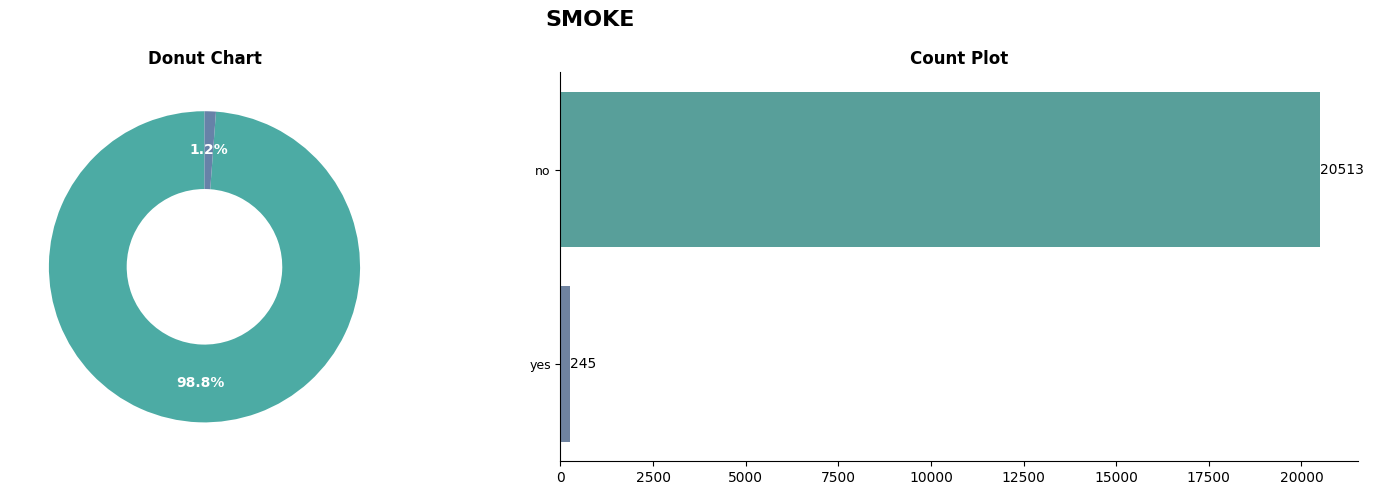

Plotting: SCC


/home/israa/Desktop/ML_proj/utils.py:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=categorical, y=col, ax=ax[1], order=labels, palette=colors)


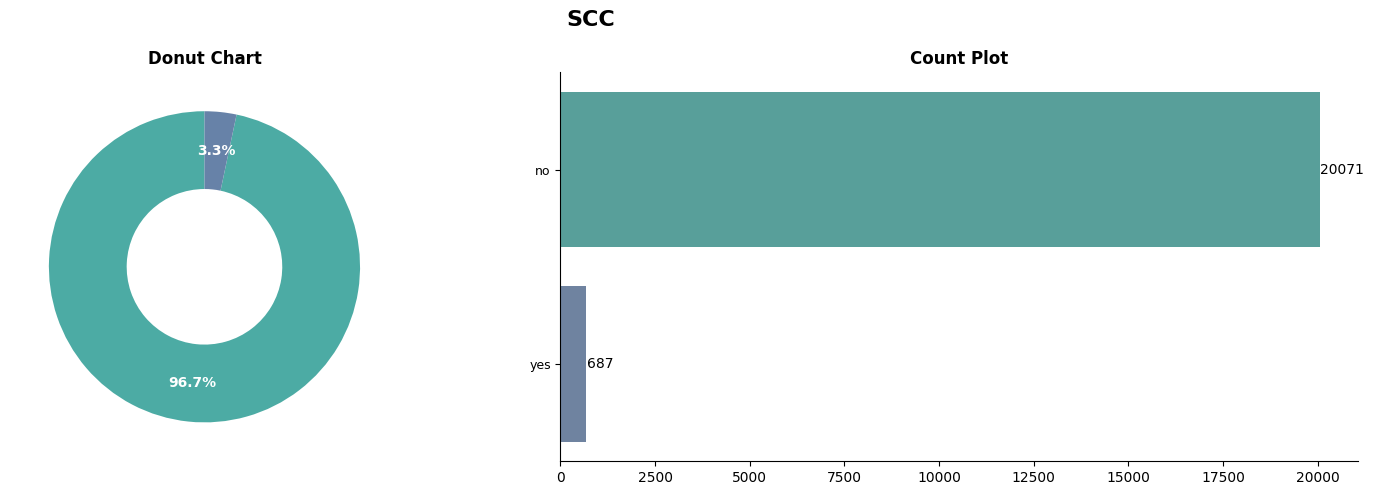

Plotting: CALC


/home/israa/Desktop/ML_proj/utils.py:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=categorical, y=col, ax=ax[1], order=labels, palette=colors)


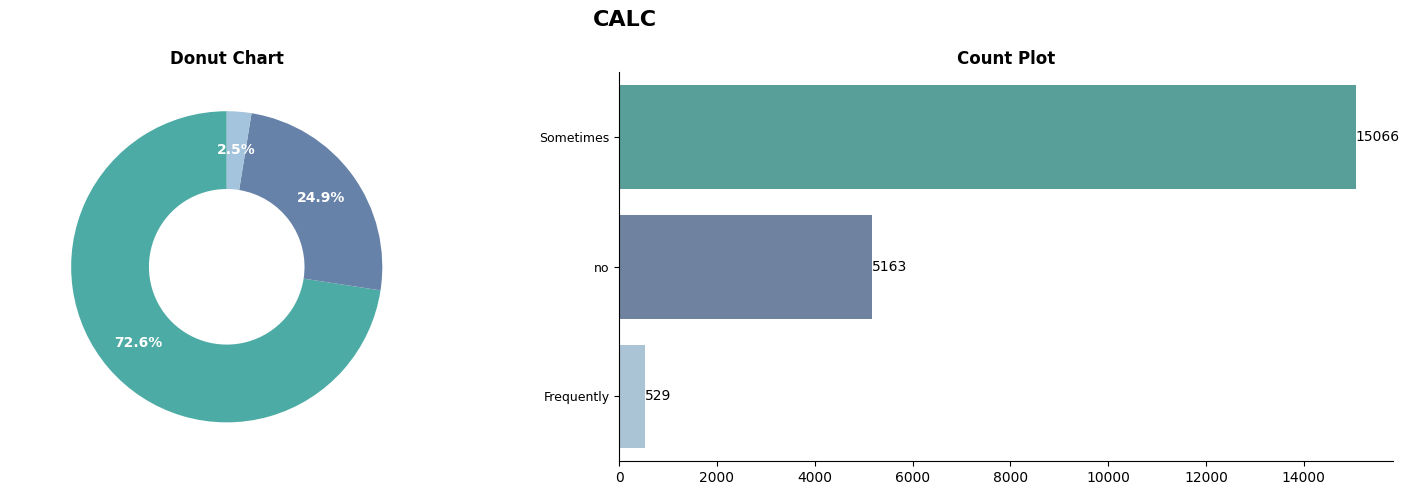

Plotting: MTRANS


/home/israa/Desktop/ML_proj/utils.py:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=categorical, y=col, ax=ax[1], order=labels, palette=colors)


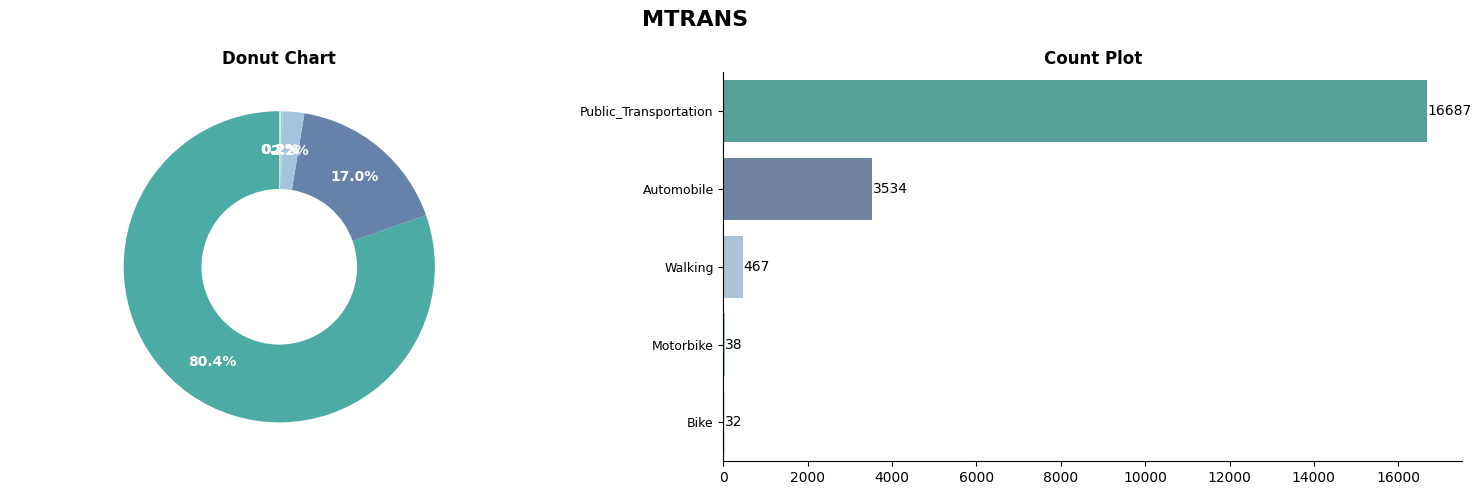

Plotting: NObeyesdad


/home/israa/Desktop/ML_proj/utils.py:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=categorical, y=col, ax=ax[1], order=labels, palette=colors)


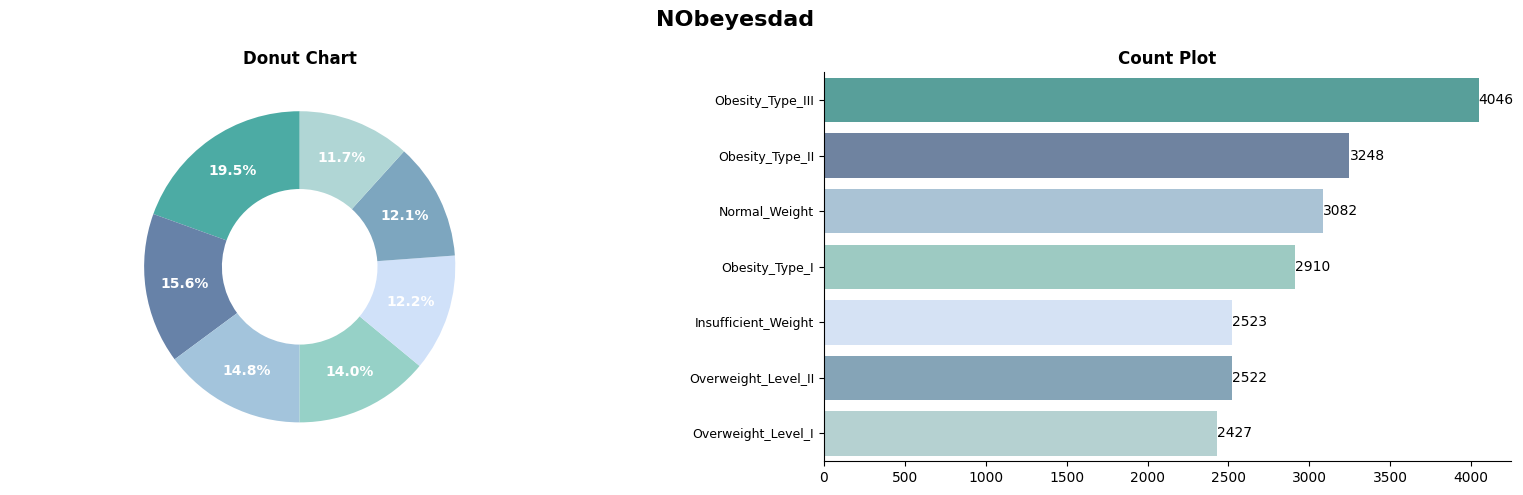

In [22]:
for column in categorical.columns:
    print(f"Plotting: {column}")
    try:
        categorical_analysis(column, categorical=categorical)
    except Exception as e:
        print(f"Error plotting {column}: {e}")

### Plot the relations of the NObeyesdad(Output) and categorical Columns

/home/israa/Desktop/ML_proj/utils.py:69: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data,x=column,palette="Blues_d",ax=axes[0])


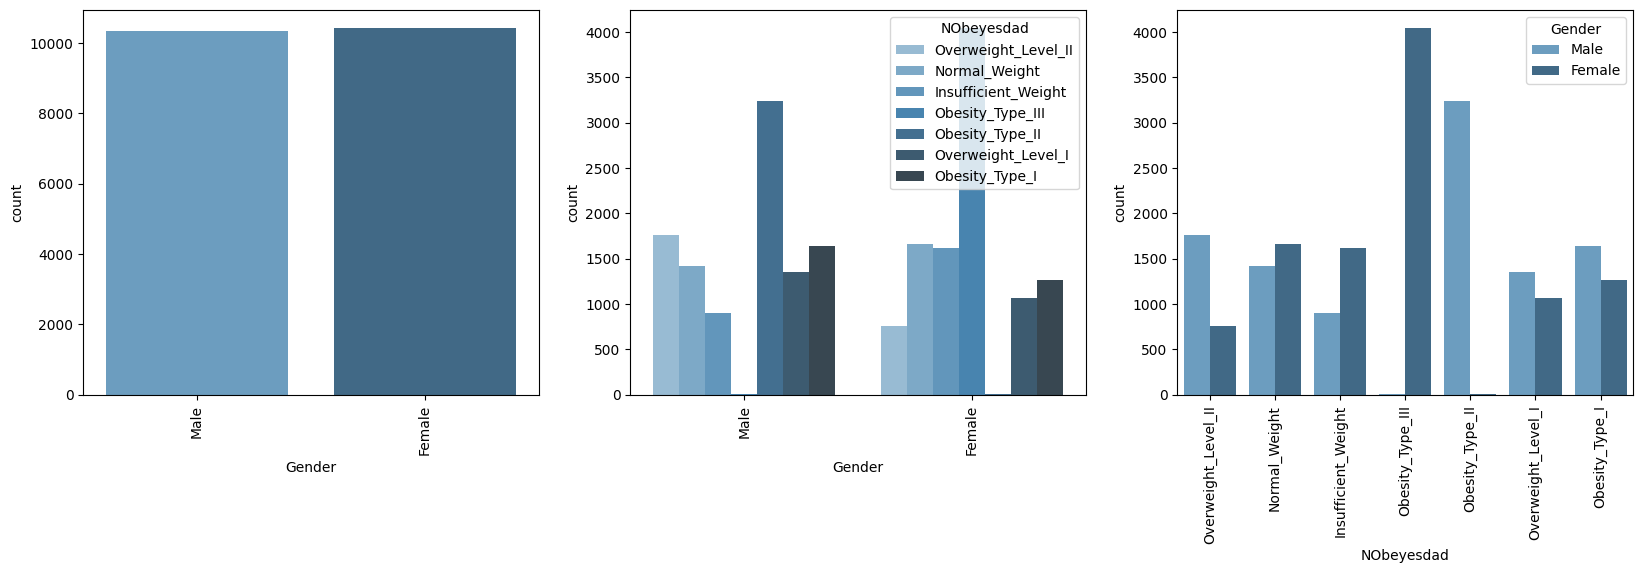

In [23]:
plot_categorical_data(train, "Gender")

/home/israa/Desktop/ML_proj/utils.py:69: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data,x=column,palette="Blues_d",ax=axes[0])


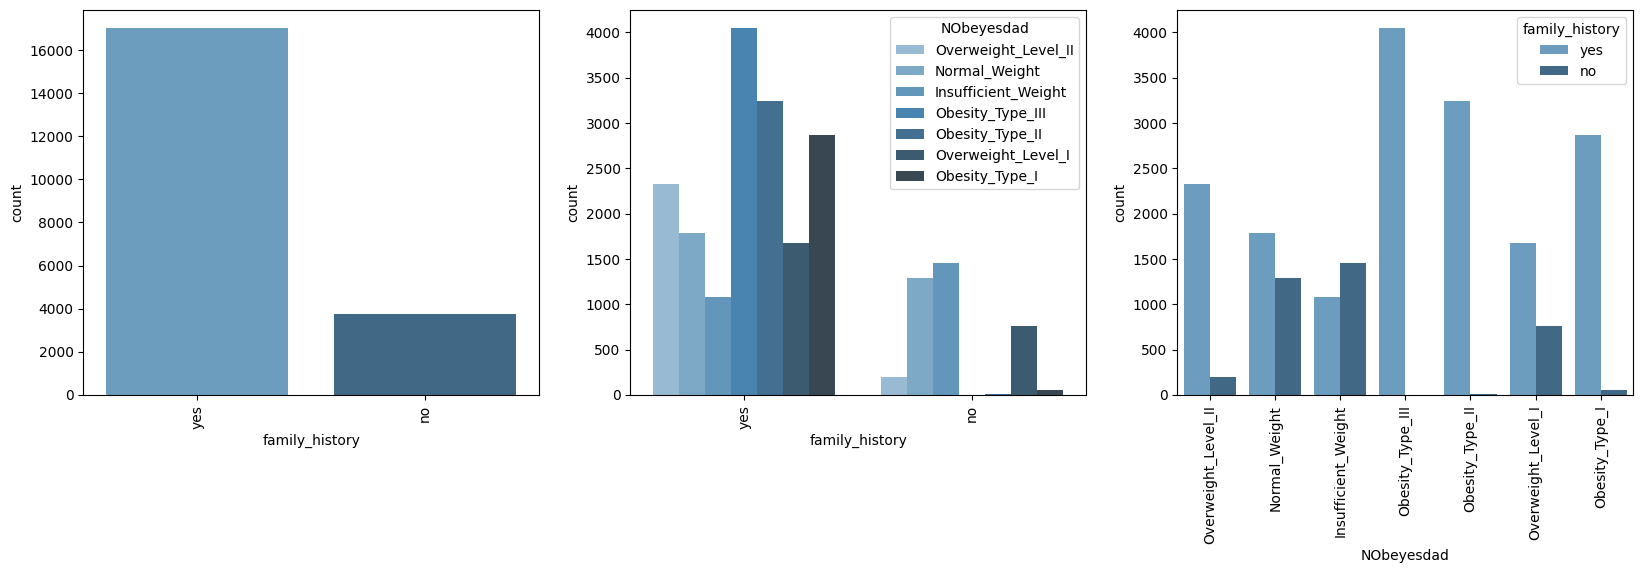

In [24]:
plot_categorical_data(train, "family_history")

/home/israa/Desktop/ML_proj/utils.py:69: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data,x=column,palette="Blues_d",ax=axes[0])


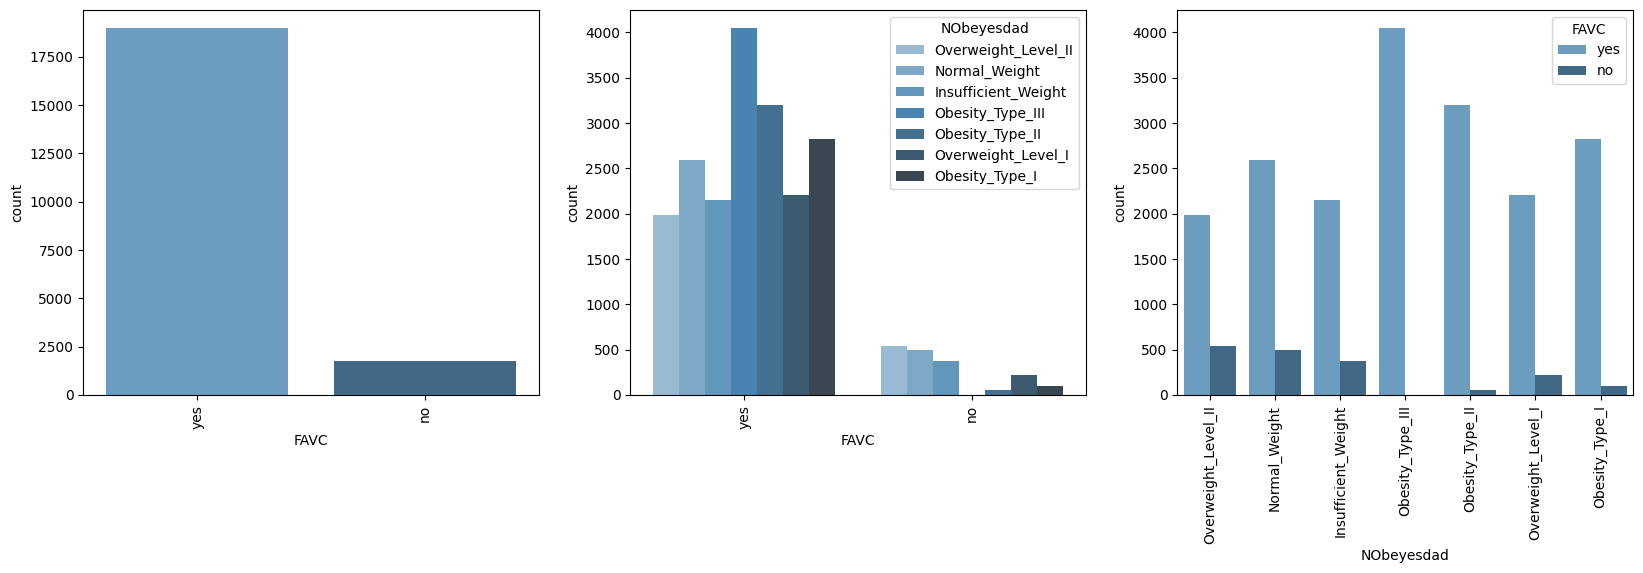

In [25]:
plot_categorical_data(train, "FAVC")

/home/israa/Desktop/ML_proj/utils.py:69: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data,x=column,palette="Blues_d",ax=axes[0])


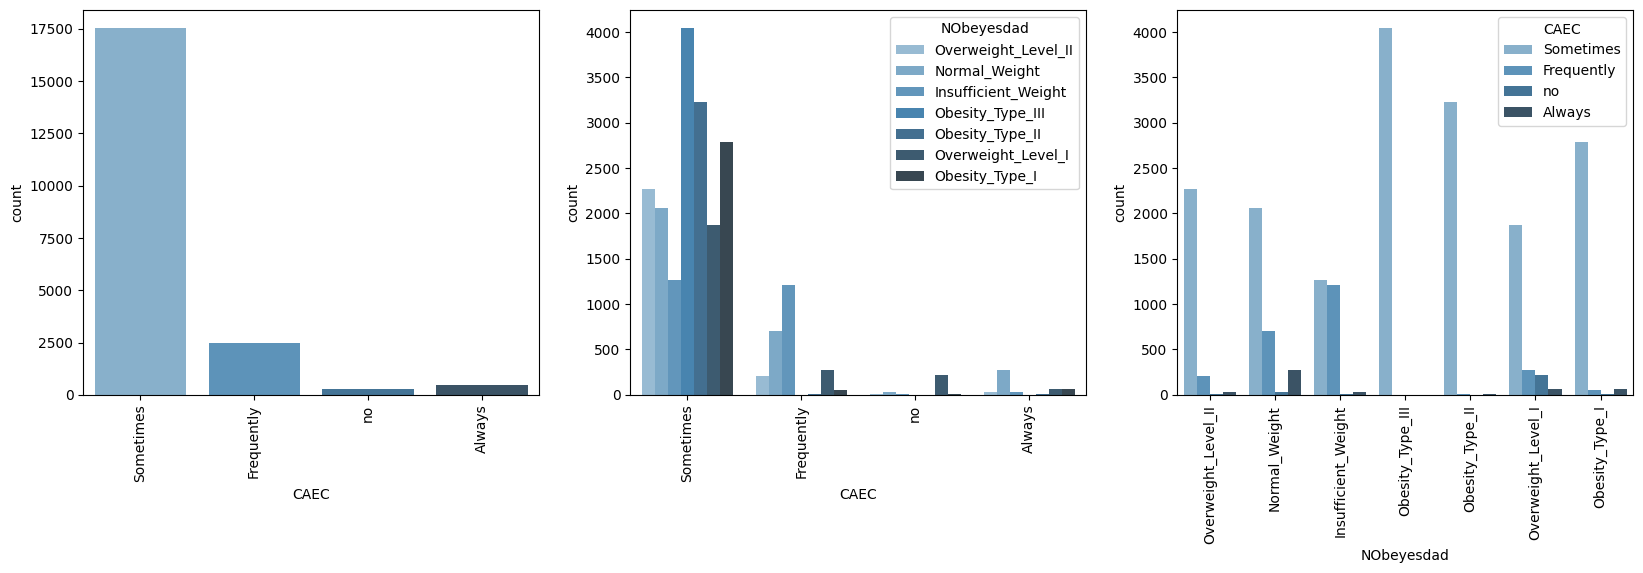

In [26]:
plot_categorical_data(train, "CAEC")


/home/israa/Desktop/ML_proj/utils.py:69: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data,x=column,palette="Blues_d",ax=axes[0])


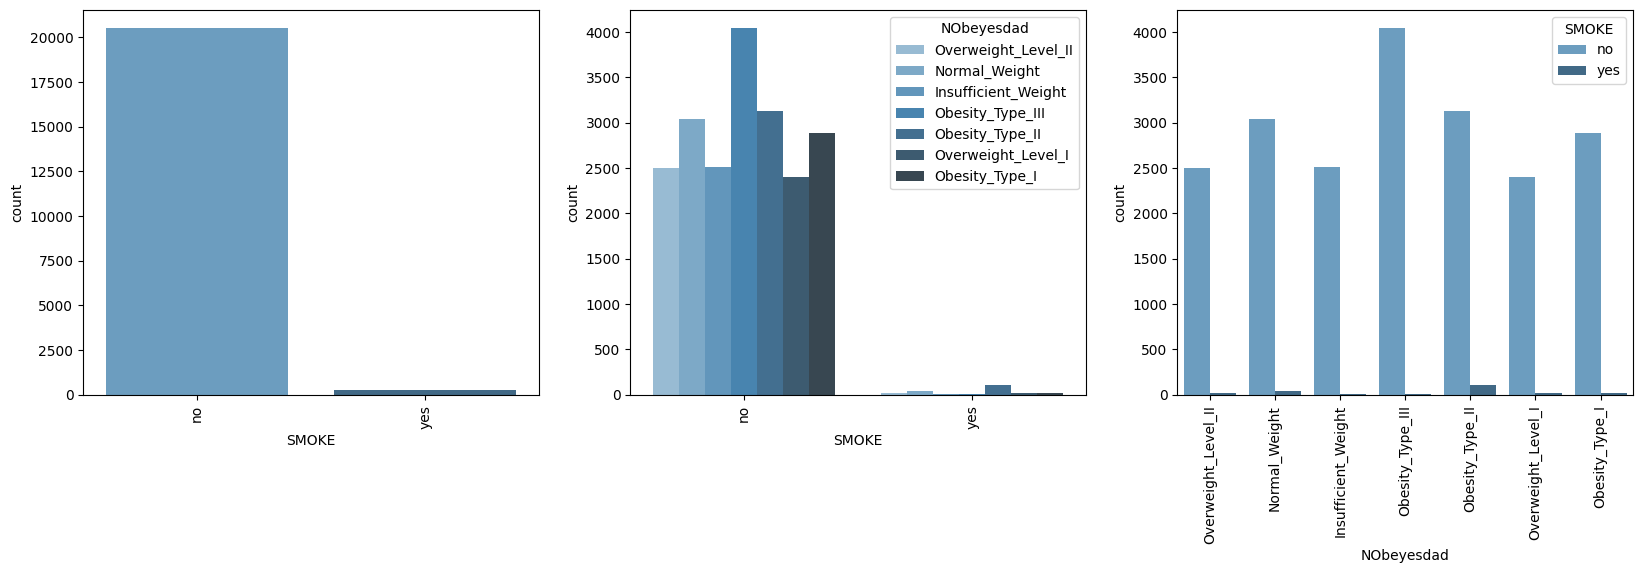

In [27]:
plot_categorical_data(train, "SMOKE")


/home/israa/Desktop/ML_proj/utils.py:69: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data,x=column,palette="Blues_d",ax=axes[0])


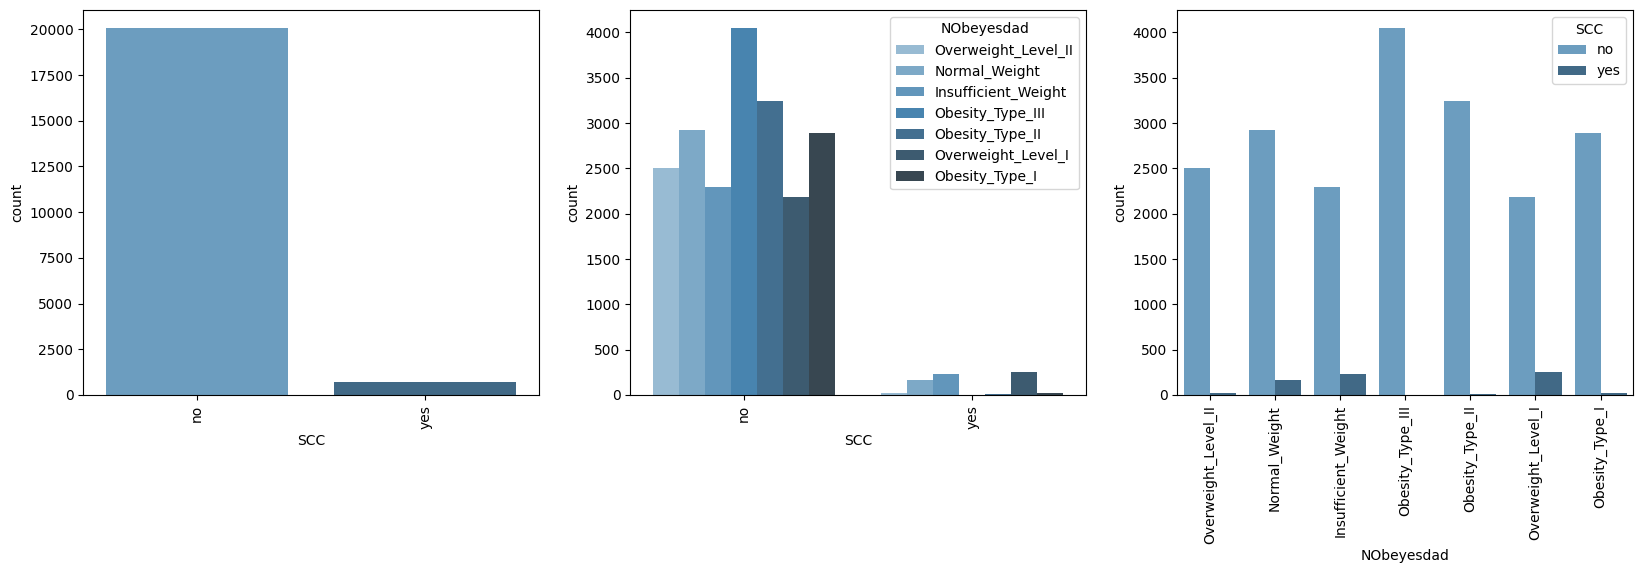

In [28]:
plot_categorical_data(train, "SCC")


/home/israa/Desktop/ML_proj/utils.py:69: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data,x=column,palette="Blues_d",ax=axes[0])


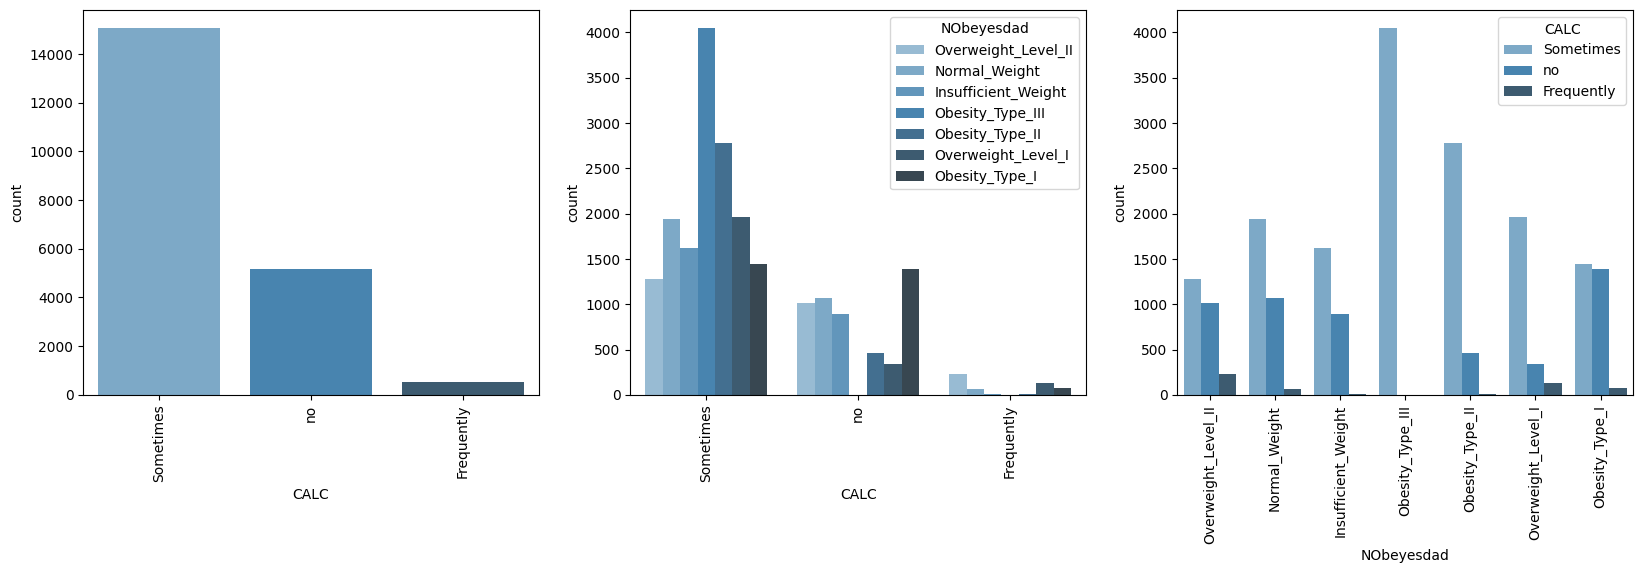

In [29]:
plot_categorical_data(train, "CALC")


/home/israa/Desktop/ML_proj/utils.py:69: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data,x=column,palette="Blues_d",ax=axes[0])


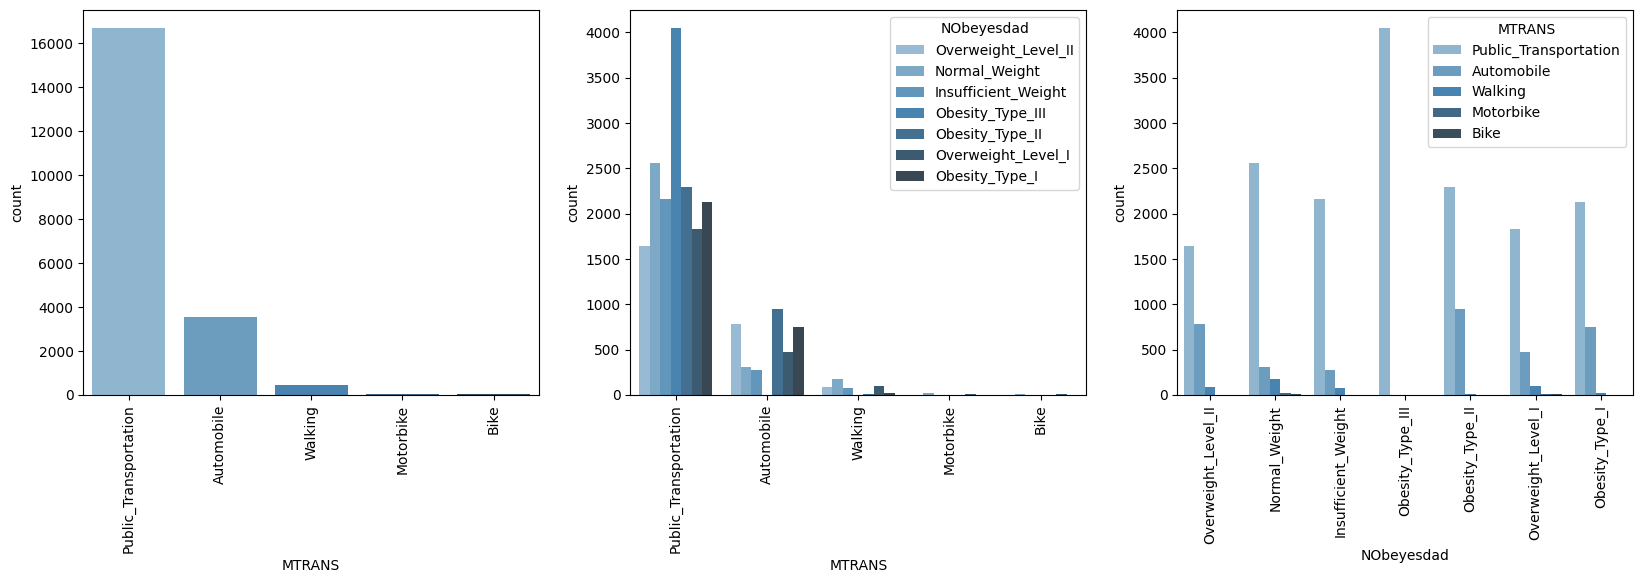

In [30]:
plot_categorical_data(train, "MTRANS")


### Plot the relations of the NObeyesdad(output) and Numerical Columns

/home/israa/Desktop/ML_proj/utils.py:81: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=data,x=column,palette="Blues_d",ax=axes[0])
/home/israa/Desktop/ML_proj/utils.py:84: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data,x=column,palette="Blues_d",ax=axes[2])
/home/israa/Desktop/ML_proj/utils.py:87: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=mean,x="NObeyesdad",y=column,palette="Blues_d",ax=axes[3])


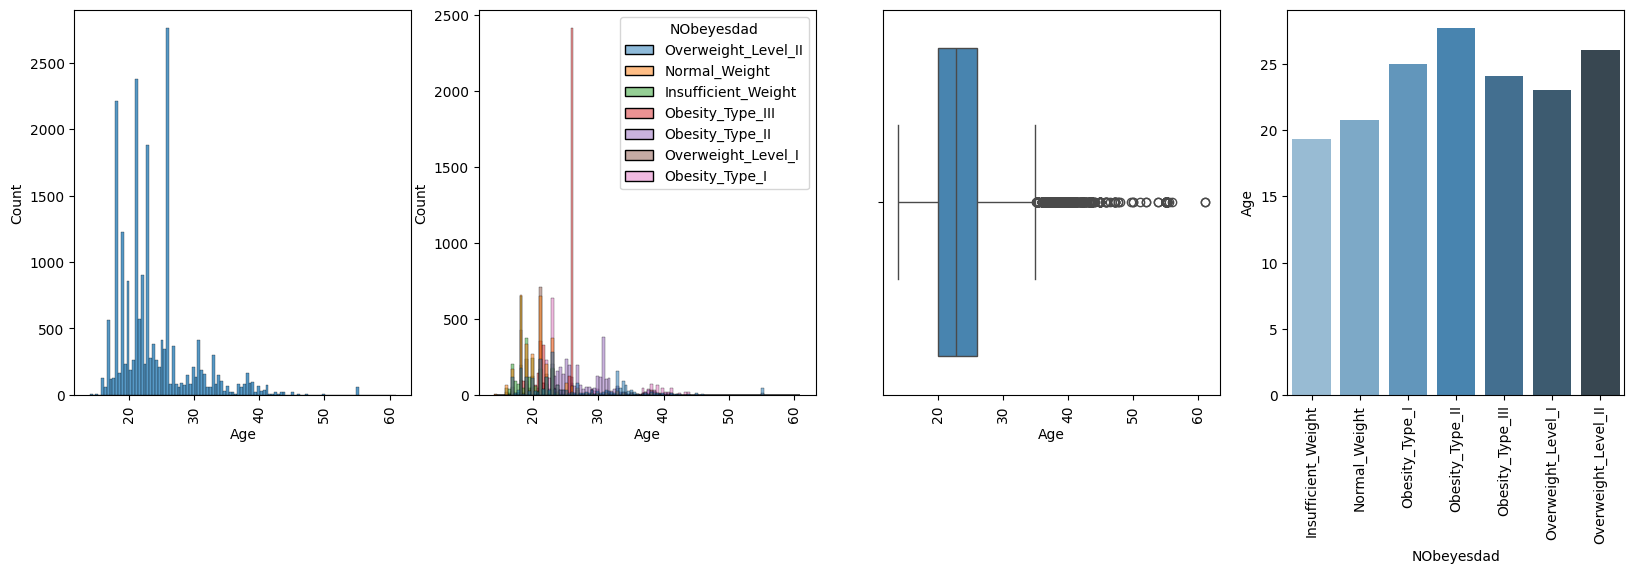

In [31]:
plot_numerical_data(train, "Age")

/home/israa/Desktop/ML_proj/utils.py:81: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=data,x=column,palette="Blues_d",ax=axes[0])
/home/israa/Desktop/ML_proj/utils.py:84: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data,x=column,palette="Blues_d",ax=axes[2])
/home/israa/Desktop/ML_proj/utils.py:87: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=mean,x="NObeyesdad",y=column,palette="Blues_d",ax=axes[3])


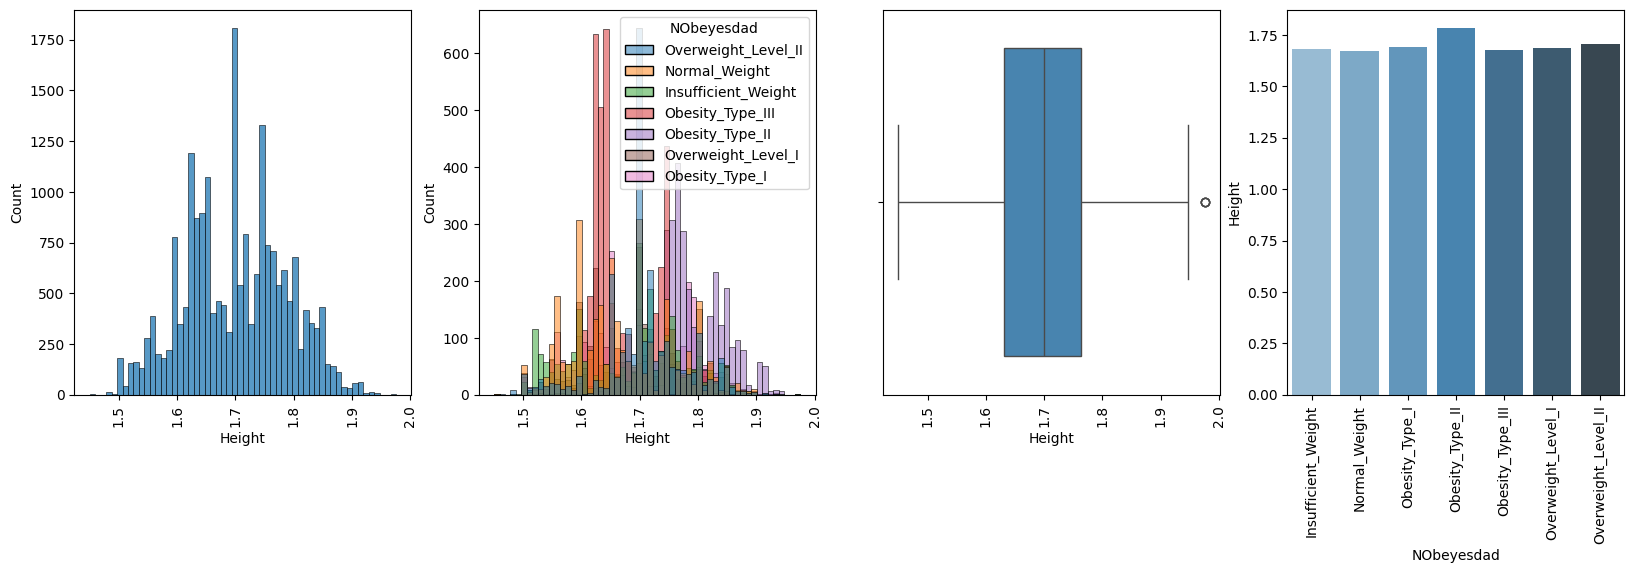

In [32]:
plot_numerical_data(train, "Height")


/home/israa/Desktop/ML_proj/utils.py:81: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=data,x=column,palette="Blues_d",ax=axes[0])
/home/israa/Desktop/ML_proj/utils.py:84: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data,x=column,palette="Blues_d",ax=axes[2])
/home/israa/Desktop/ML_proj/utils.py:87: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=mean,x="NObeyesdad",y=column,palette="Blues_d",ax=axes[3])


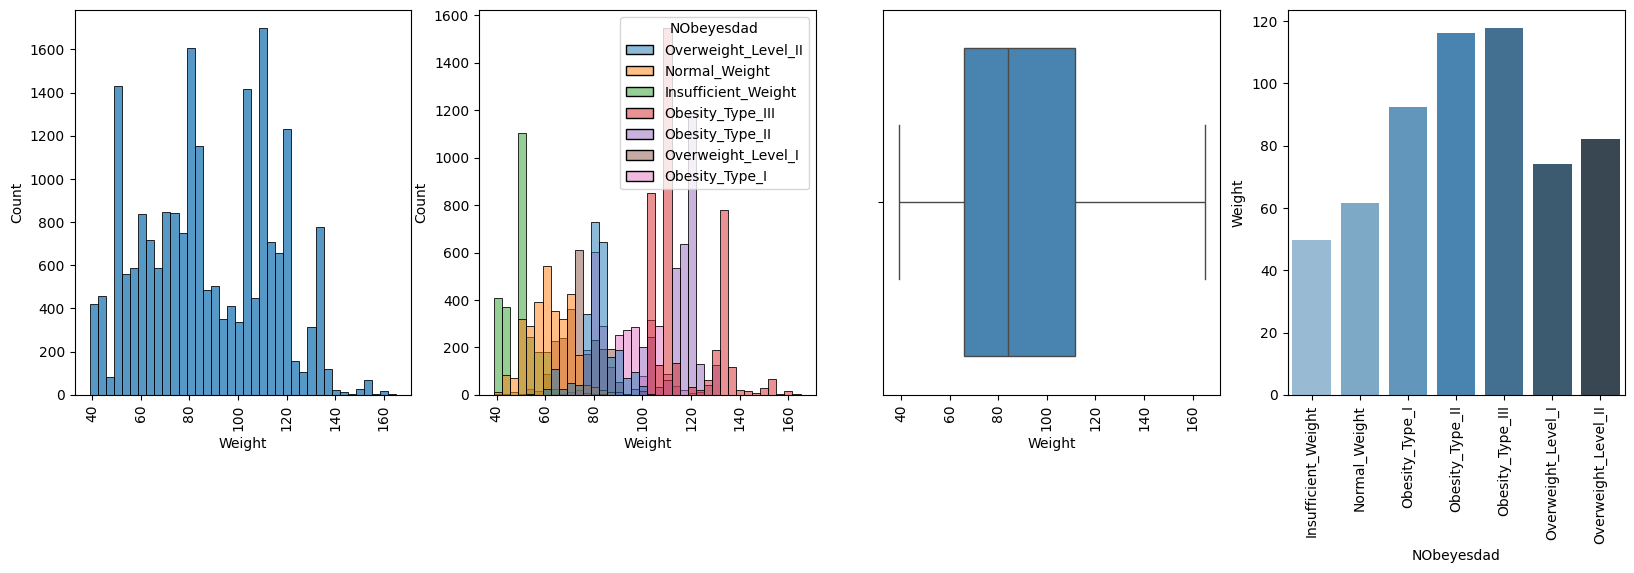

In [33]:
plot_numerical_data(train, "Weight")

/home/israa/Desktop/ML_proj/utils.py:81: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=data,x=column,palette="Blues_d",ax=axes[0])
/home/israa/Desktop/ML_proj/utils.py:84: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data,x=column,palette="Blues_d",ax=axes[2])
/home/israa/Desktop/ML_proj/utils.py:87: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=mean,x="NObeyesdad",y=column,palette="Blues_d",ax=axes[3])


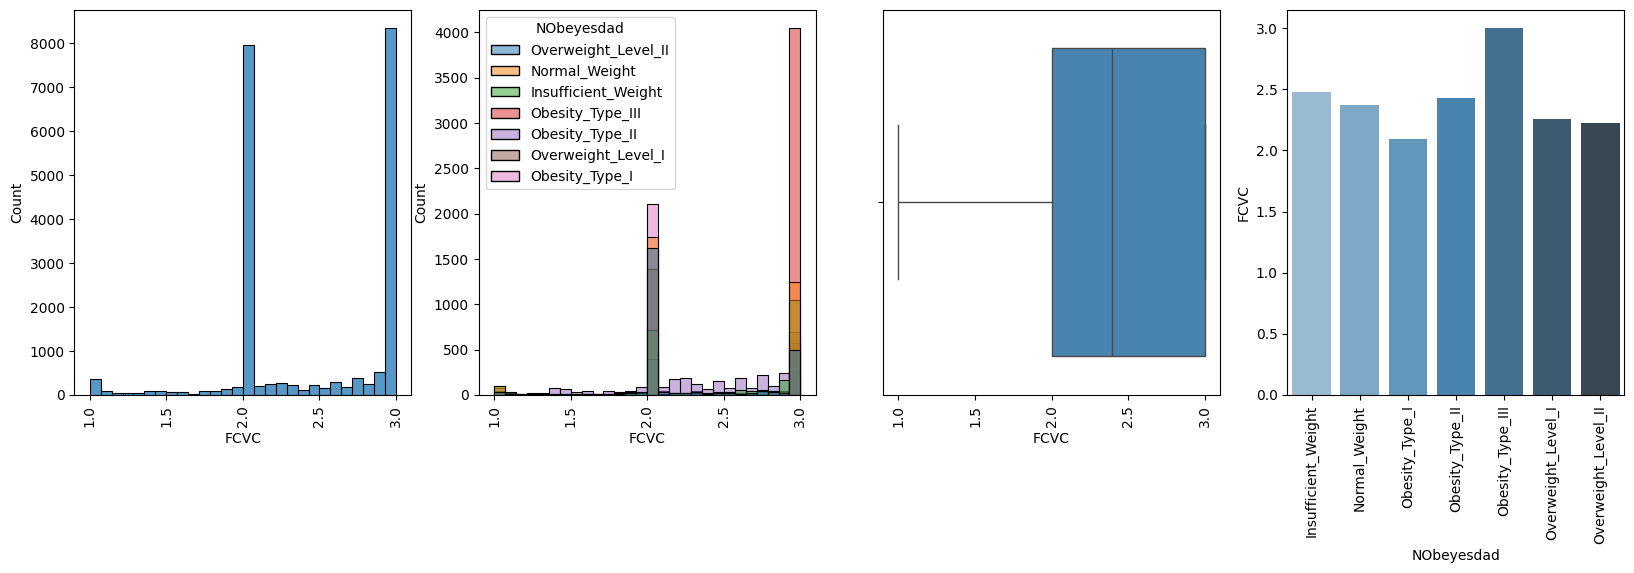

In [34]:
plot_numerical_data(train, "FCVC")

/home/israa/Desktop/ML_proj/utils.py:81: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=data,x=column,palette="Blues_d",ax=axes[0])
/home/israa/Desktop/ML_proj/utils.py:84: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data,x=column,palette="Blues_d",ax=axes[2])
/home/israa/Desktop/ML_proj/utils.py:87: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=mean,x="NObeyesdad",y=column,palette="Blues_d",ax=axes[3])


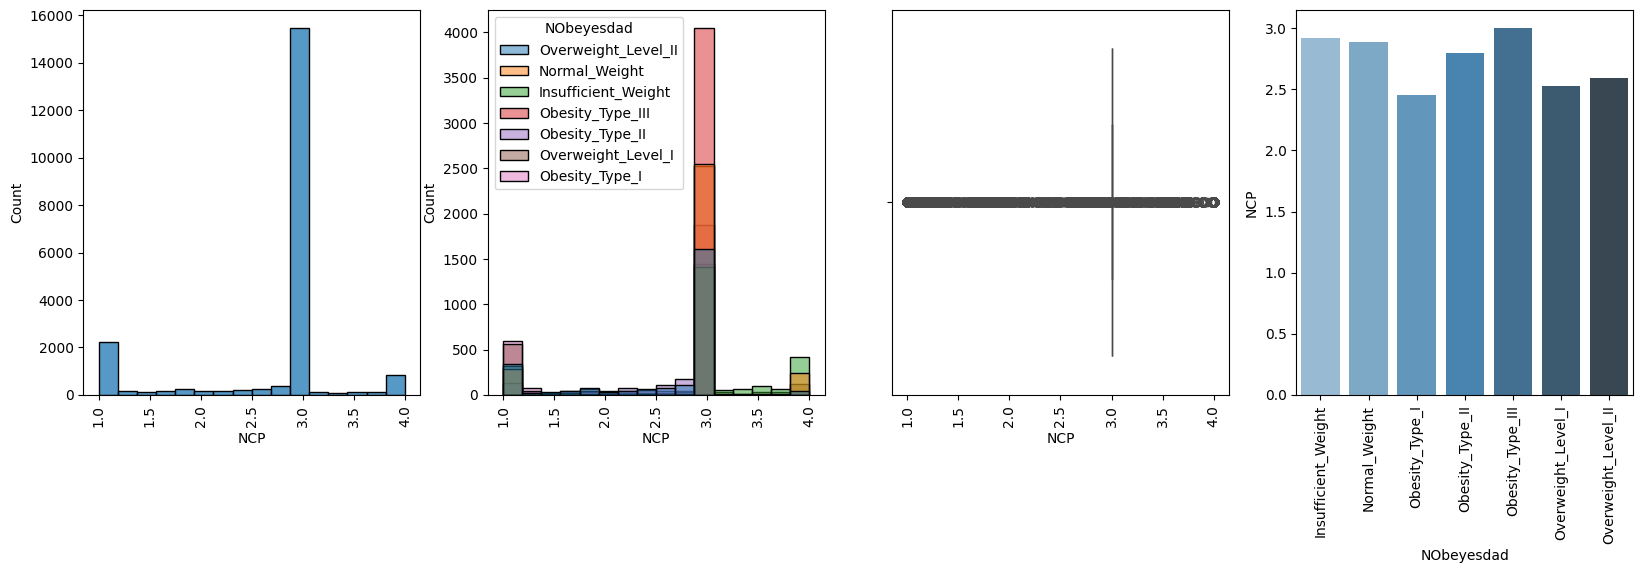

In [35]:
plot_numerical_data(train, "NCP")

/home/israa/Desktop/ML_proj/utils.py:81: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=data,x=column,palette="Blues_d",ax=axes[0])
/home/israa/Desktop/ML_proj/utils.py:84: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data,x=column,palette="Blues_d",ax=axes[2])
/home/israa/Desktop/ML_proj/utils.py:87: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=mean,x="NObeyesdad",y=column,palette="Blues_d",ax=axes[3])


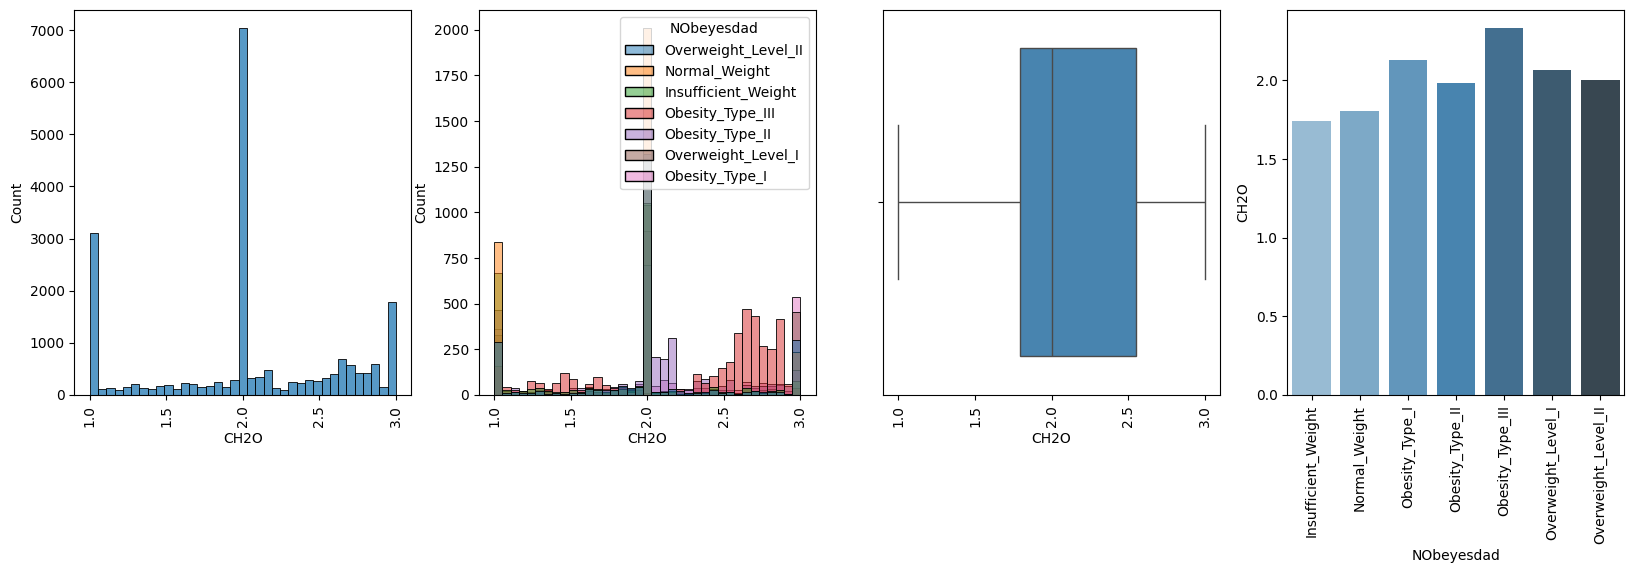

In [36]:
plot_numerical_data(train, "CH2O")


/home/israa/Desktop/ML_proj/utils.py:81: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=data,x=column,palette="Blues_d",ax=axes[0])
/home/israa/Desktop/ML_proj/utils.py:84: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data,x=column,palette="Blues_d",ax=axes[2])
/home/israa/Desktop/ML_proj/utils.py:87: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=mean,x="NObeyesdad",y=column,palette="Blues_d",ax=axes[3])


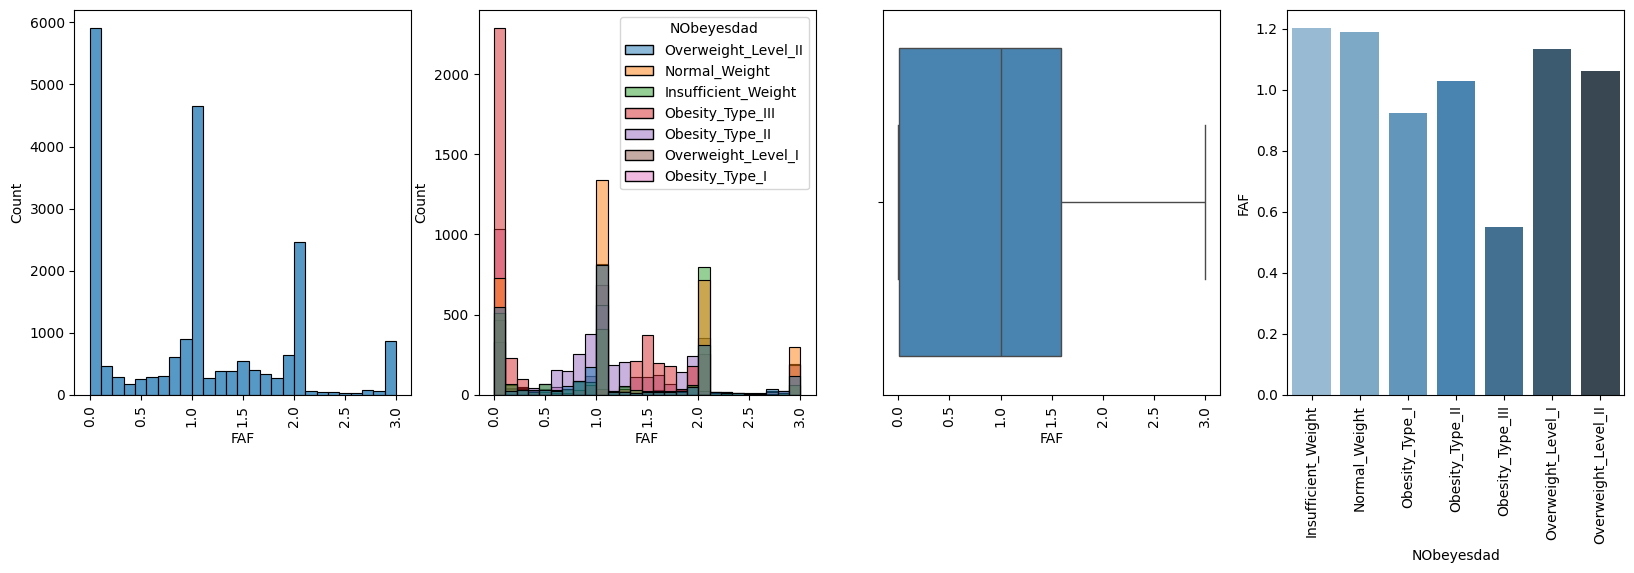

In [37]:
plot_numerical_data(train, "FAF")


/home/israa/Desktop/ML_proj/utils.py:81: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=data,x=column,palette="Blues_d",ax=axes[0])
/home/israa/Desktop/ML_proj/utils.py:84: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data,x=column,palette="Blues_d",ax=axes[2])
/home/israa/Desktop/ML_proj/utils.py:87: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=mean,x="NObeyesdad",y=column,palette="Blues_d",ax=axes[3])


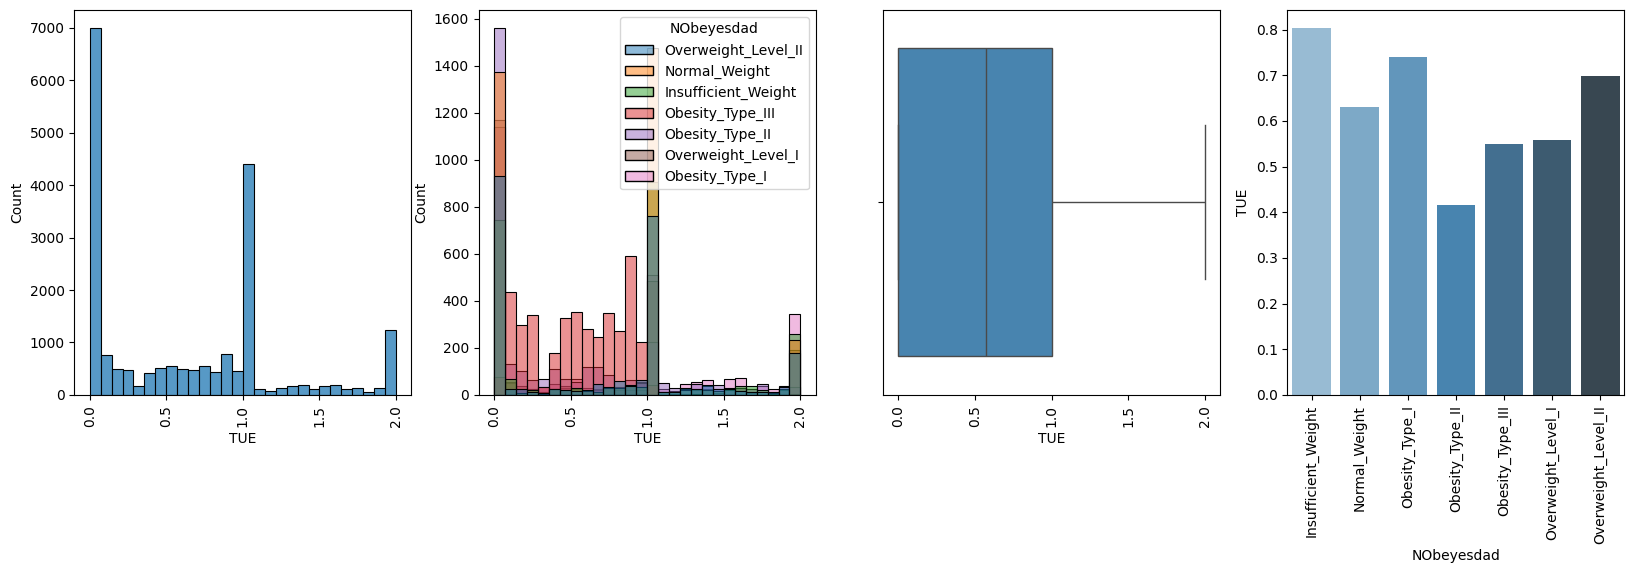

In [38]:
plot_numerical_data(train, "TUE")


### Correlation Matrix

- between Numerical Data

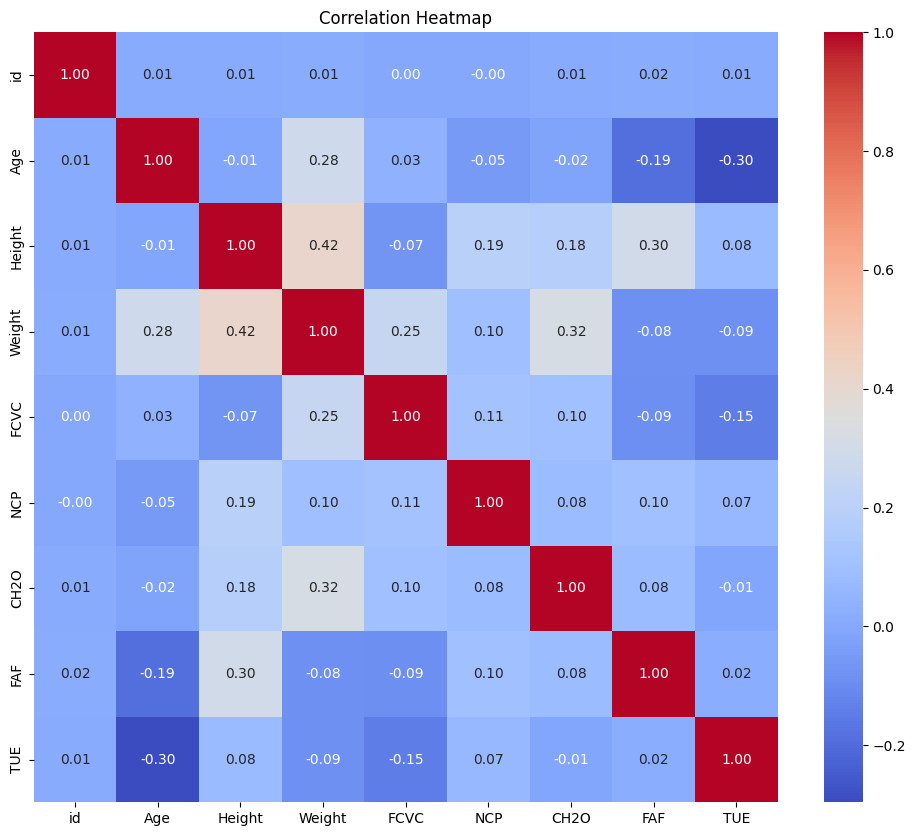

In [39]:
# print the heat map of numerical columns
plt.figure(figsize=(12, 10))
sns.heatmap(train[numerical.columns].corr(), annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Heatmap")
plt.show()

- Between numerical features and categorical features

In [40]:
map_data(train)

,id,Gender,Age,Height,Weight,family_history,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,1,24.443011,1.699998,81.669950,1,1,2.000000,2.983297,1,0,2.763573,0,0.000000,0.976473,1,0,3
1,1,0,18.000000,1.560000,57.000000,1,1,2.000000,3.000000,2,0,2.000000,0,1.000000,1.000000,0,1,1
2,2,0,18.000000,1.711460,50.165754,1,1,1.880534,1.411685,1,0,1.910378,0,0.866045,1.673584,0,0,0
3,3,0,20.952737,1.710730,131.274851,1,1,3.000000,3.000000,1,0,1.674061,0,1.467863,0.780199,1,0,6
4,4,1,31.641081,1.914186,93.798055,1,1,2.679664,1.971472,1,0,1.979848,0,1.967973,0.931721,1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20753,20753,1,25.137087,1.766626,114.187096,1,1,2.919584,3.000000,1,0,2.151809,0,1.330519,0.196680,1,0,5
20754,20754,1,18.000000,1.710000,50.000000,0,1,3.000000,4.000000,2,0,1.000000,0,2.000000,1.000000,1,0,0
20755,20755,1,20.101026,1.819557,105.580491,1,1,2.407817,3.000000,1,0,2.000000,0,1.158040,1.198439,0,0,5
20756,20756,1,33.852953,1.700000,83.520113,1,1,2.671238,1.971472,1,0,2.144838,0,0.000000,0.973834,0,1,3


<Axes: >

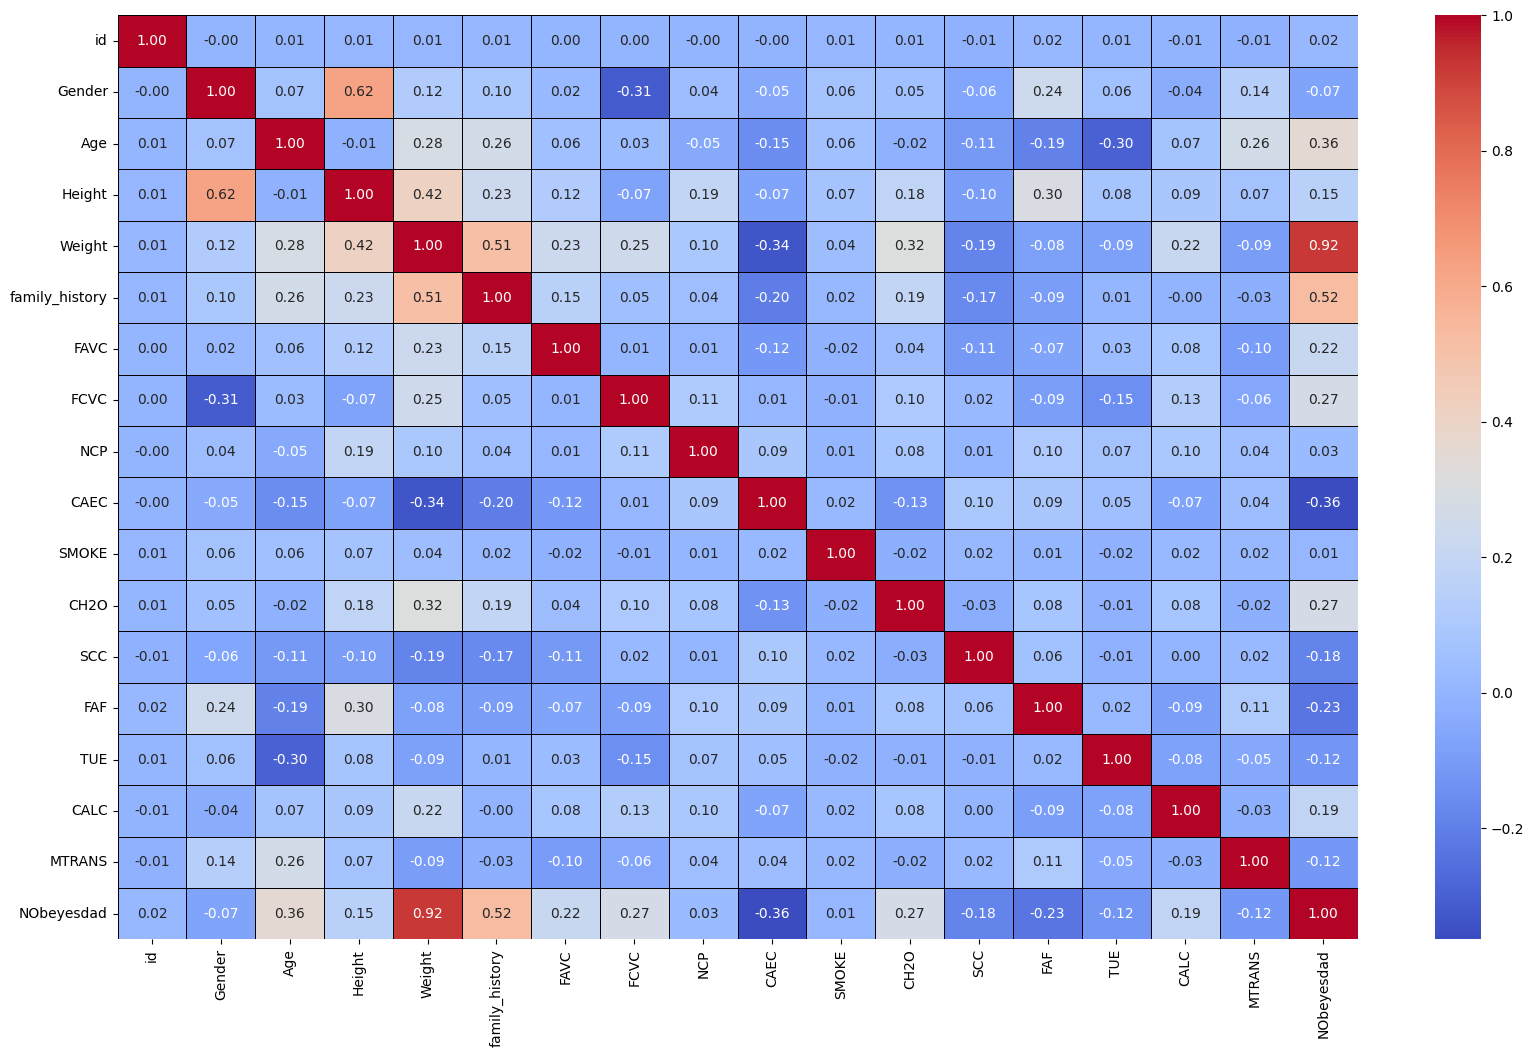

In [41]:
plt.figure(figsize=(20, 12))
sns.heatmap(train.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, linecolor='black', cbar=True)

weight and family history are the most factors that affects the result 